In [ ]:
#Chapter 3 Examples from "An Introduction to Quantum Computing" (Kaye, Leaflamme, Mosca)

#Worked with Qutip version 5.0.2 
#Numpy
#Juptyr Notebook 
#Scipy 1.13.1 
#Matplotlib

#Daequan Peele 
#June 2024 

#Markdown cheat sheet:
#![title](images/imagename.png)

In [1]:
#imports 
from qutip import *
import matplotlib.pyplot as plt
import numpy as np 
import random as rand

In [7]:
# Write a python function that outputs a single qubit state given the angles of the Bloch sphere: theta and phi.

# A qubit state is described as a complex unit vector |phi> in a 2D Hilbert space. This vector is typically written in the form

# |phi> cos(theta/2) * |0> + e^(i * rho) * sin(theta/2) * |1>

#This state vector is often depicted as a point on the Bloch Sphere, where the real parameters theta and rho are sufficent to describe a state vector. These points on the Sphere can be represented as the cartesian coordinates: 

#(x,y,z) = ( sin(theta)cos(rho), sin(theta)sin(rho),  cos(theta) )

def create_state(theta, phi):
    st_vect = np.cos(theta/2) * basis(2,0) + np.power(np.e, 1j * phi) * np.sin(theta/2) * basis(2,1)
    #np.exp() 
    print(st_vect)

create_state(0,0) #outputs the zero state 



Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]


In [47]:
create_state(6,9)

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[-0.9899925 +0.j        ]
 [-0.12857871+0.05815816j]]


In [29]:
#STATE 0  |0> 
# [1 0]
print("Zero State: ")
print(basis(2,0))
#STATE 1  |0> 
# [0 1]
print("One State: ")
print(basis(2,1)) 


#NOTE: |x> is a COLOUMN VEECTOR 
#      <x| is a ROW VECTOR

Zero State: 
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]
One State: 
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]]


In [30]:
#Verify the identity Tr[||phi><omega?|] = <omega || phi> in qutip
phi = basis(2,0)
omega = basis(2,1) 

#(phi * omega.dag()).tr() == omega.overlap(phi)
(phi * omega.dag()).tr() == omega.dag() * phi

#NOTE: Both statements are true 

True

In [51]:
# Write a function that takes in an arbitrary three dimensional axis of rotation n = (Nx, Ny, Nz) and the rotation of angle theta 
# Outputs an operator that performs the rotation around a given arbitrary axis by some angle. 
#inspired by 
#https://stackoverflow.com/questions/6721544/circular-rotation-around-an-arbitrary-axis

'''
x_unit = np.array([[[1],[0],[0]]])
y_unit = np.array([[[0],[1],[0]]])
z_unit = np.array([[[1],[0],[1]]])

xtrans = np.array([[1,0,0]])
ytrans = np.array([[0,1,0]])
ztrans = np.array([[0,0,1]])
'''

#sketch
#def threeD_operator(Nx, Ny, Nz, theta):
    #rot_axis = Nx + Ny + Nz #what type?  
    #Quaternion?? 
    #x y z are column vectors (kets)
        #x = 1 0 0   #basis(3,0)
        #y = 0 1 0   #basis(3,1)  #NOTE unit kets (ijk) in 3D
        #z = 0 0 1   #basis(3,2)
    #rot_axis = Qobj((Nx * basis(3,0)) + (Ny * basis(3,1)) + (Nz * basis(3,2)))
    #Define a Quaternion matrix to rotate on axis, given rotation angle (radians) 
    #quart = cos(theta/2) + sin(theta/2) * rot_axis 
    #output the quaternion? 
    #no, use the quaternion to perform a rotation matrix
    
    #     (q0^2 + q1^2 - q2^2 - q3^2)  2(q1q2 - q0q3)                   2(q1q3 + q0q2)
    #Q =  2(q2q1 + q0q3)               2(q0^2 - q1^2 + q2^2 - q3^2)     2(q2q3 - q0q1)
    #     2(q3q1 - q0q2)               2(q3q2 + q0q1)                   (q0^2 - q1^2 - q2^2 + q3^2)
    # Q Q' = 1, rotation matrix is orthogonal 
    #where 


In [40]:
theta = np.pi

Nx = 0
Ny = 0.6 
Nz = 0.8

q0 =  np.fix(np.cos(theta / 2))
q1 =  np.sin(theta / 2) * Nx
q2 =  np.sin(theta / 2) * Ny #basis(3,1)#y
q3 =  np.sin(theta / 2) * Nz #basis(3,2)#z

print(q0)
print(q1)
print(q2)
print(q3)
q0_square = q0**2
q1_square = q1**2
q2_square = q2**2
q3_square = q3**2

#create matrix  

q = Qobj(( [q0**2 + q1**2 - q2**2 - q3**2, (2 * (q1 * q2 - q0 * q3)), (2 *(q1 * q3 + q0 * q2))],
           
           [(2 * (q2 * q1 + q0 * q3)), 2 * (q0 - q1**2) + (q2**2 - q3**2), (2 * (q2 * q3 - q0 * q1))],
           
           [(2 * (q3 * q1 - q0 * q2)), (2 * (q3 * q2 + q0 * q1)), q0**2 - q1**2 - q2**2 + q3**2]))
print(q)
'''
aq = np.array(( [q0_square+q1_square-q2_square-q3_square, (2 * ((q1 * q2) - (q0 * q3))), (2 *((q1 * q3) + (q0 * q2)))],
           
                [(2*((q2 * q1) + (q0 * q3))), (2*(q0 - q1_square + q2_square - q3_square)), (2 * ((q2 * q3) - (q0 * q1)))],
           
                [(2*((q3 * q1) - (q0 * q2))), (2*((q3 * q2) + (q0 * q1))), q0_square-q1_square-q2_square+q3_square]))
print(aq)
#real 
#xtrans = np.array([[1,0,0], [4,4,4], [5,5,5]])
#print(xtrans)
'''

0.0
0.0
0.6
0.8
Quantum object: dims=[[3], [3]], shape=(3, 3), type='oper', dtype=Dense, isherm=True
Qobj data =
[[-1.    0.    0.  ]
 [ 0.   -0.28  0.96]
 [ 0.    0.96  0.28]]


'\ndef threeD_operator(Nx, Ny, Nz, theta):\n    rot_axis = Qobj((Nx * basis(3,0)) + (Ny * basis(3,1)) + (Nz * basis(3,2)))\n    quart = (np.cos(theta/2) + np.sin(theta/2)) * rot_axis\n    print(quart)\n\nthreeD_operator(0, 0.6, 0.8, np.pi)\n'

In [52]:
#Actual Code 

def threeD_operator(Nx, Ny, Nz, theta):
    rot_axis = Qobj((Nx * basis(3,0)) + (Ny * basis(3,1)) + (Nz * basis(3,2)))
    
    q0 =  np.fix(np.cos(theta / 2))
    q1 =  np.sin(theta / 2) * Nx
    q2 =  np.sin(theta / 2) * Ny 
    q3 =  np.sin(theta / 2) * Nz 
    
    q = Qobj(( [q0**2 + q1**2 - q2**2 - q3**2,  (2 * (q1 * q2 - q0 * q3)),           (2 *(q1 * q3 + q0 * q2))],
           
               [(2 * (q2 * q1 + q0 * q3)),    2 * (q0 - q1**2) + (q2**2 - q3**2),    (2 * (q2 * q3 - q0 * q1))],
           
               [(2 * (q3 * q1 - q0 * q2)),      (2 * (q3 * q2 + q0 * q1)),           q0**2 - q1**2 - q2**2 + q3**2]))
    mult = q * rot_axis
    print(f"The Operator that performs a rotation by angle {theta} around axis {Nx}i + {Ny}j + {Nx}k is as follows:")
    print(q) 
    print("Rotational vector * Quaternion:")
    print(mult)

threeD_operator(0, 0.6, 0.8, np.pi)


The Operator that performs a rotation by angle 3.141592653589793 around axis 0i + 0.6j + 0k is as follows:
Quantum object: dims=[[3], [3]], shape=(3, 3), type='oper', dtype=Dense, isherm=True
Qobj data =
[[-1.    0.    0.  ]
 [ 0.   -0.28  0.96]
 [ 0.    0.96  0.28]]
Rotational vector * Quaternion:
Quantum object: dims=[[3], [1]], shape=(3, 1), type='ket', dtype=Dense
Qobj data =
[[0. ]
 [0.6]
 [0.8]]


In [ ]:
#Attempt 2 
# Write a function that takes in an arbitrary three dimensional axis of rotation n = (Nx, Ny, Nz) and the rotation of angle theta 
# Outputs an operator that performs the rotation around a given arbitrary axis by some angle.

#Rx(theta) = [[np.cos(theta/2), -1j * np.sin(theta/2)], [-1j * np.sin(theta/2), np.cos(theta/2)]]
#Ry(theta) = [[np.cos(theta/2), -np.sin(theta/2)], [np.sin(theta/2), np.cos(theta/2)]]
#Rz(theta) = [[e^-1j(theta/2), 0], [0, e^1j(theta/2)]]

#arbitrary 1-qubit state: 
#U = Qobj[[cos(something/2) * basis(2,0)], [e^1j(something) * basis(2,1)]]

#U = e^ia Rz(beta)Ry(gamma)Rz(delta)
#where alpha is an angle?

#U = e^ia A X B X C
#where X is the NOT gate 
#A, B and C are Unitary operators #rotations? 

#U = e^i(theta) NxA X NyB X NzC 

#You can decompose any 1-qubit state into a sequence of 2 rotations about z-axis, and 1 rotation around the y-axis (with a suitable phase factor) 
#phase factor = e^i(theta)

In [81]:
#Rx = Qobj([[np.cos(theta/2), -1j * np.sin(theta/2)], [-1j * np.sin(theta/2), np.cos(theta/2)]])
#Ry = Qobj([[np.cos(theta/2), -np.sin(theta/2)], [np.sin(theta/2), np.cos(theta/2)]])
#Rz = Qobj([[np.e^-1j(theta/2), 0], [0, np.e^1j(theta/2)]])

def threeD_operator(Nx, Ny, Nz, theta):
    U = Qobj()
#threeD_operator(1, 1, 1, np.pi)


#sigmay()
#sigmaz()

In [ ]:
#Demonstrate with Qutip the way a small rotation (an example of a coherent error) compunds over time by multiplying togeter N copies of the same unitary rotation. 
#What is the result of the multiplication? Verify in QutiP

In [704]:
#Write a function that takes in any 2 qubit input state, performs a measurement on the + - basis (on the first qubit), and then randomly returns the measurement outcome acording to the correct probabilities, as well as the resulting state after the measurement has been performed 
#use test cases you understand and explain the result 

#Single State Measure:
def single_state_measure(one_state): 
    #proj = Qobj |-> * <-|
    ket  = 1 / np.sqrt(2) * (basis(2,0) - basis(2,1)) 
    proj = ket * (ket).dag()
    UnnormpMS = proj * one_state
    Prob_minus = np.abs(UnnormpMS.overlap(UnnormpMS))
    
    print(f"Minus Prob: {Prob_minus}")  
    Prob_plus = 1 - Prob_minus 
    print(f"Plus Prob: {Prob_plus}") 
    #r = np.random.uniform(Prob_plus,Prob_minus) 
    
    r = rand.choices(population=[["-"], ["+"]], weights=[Prob_minus, Prob_plus], k=10)
    return f"Measured 10 times: {r}"
    '''
    rng = np.random.default_rng()
    r = rng.random()
    if r < Prob_minus: 
        return "-" 
    else:
        return "+"
    #one_state 
    '''
    # one_state = returns 50% + and - (|0>) or (|1>) |+i> and |-i> state 
    # #one_state = returns + or - 100% of the time  |+> and |-> 
    #run function * 10 and OBSERVE 
    
    #return normalized post measurement state (ket)
    #return whether or not the outcome is "+" or "-"  

test  = (1 / np.sqrt(2)) * (basis(2,0) - basis(2,1)) 
print("Test 1: |->")
print(single_state_measure(test)) 
print('\n')
test2  = 1 / np.sqrt(2) * (basis(2,0) + basis(2,1)) 
print("Test 2: |+>")
print(single_state_measure(test2))
print('\n')

test3  = basis(2,0) 
print("Test 3: |0>")
print(single_state_measure(test3))
print('\n')

test4  = basis(2,1)  
print("Test 4: |1>")
print(single_state_measure(test4))

Test 1: |->
Minus Prob: 0.9999999999999996
Plus Prob: 4.440892098500626e-16
Measured 10 times: [['-'], ['-'], ['-'], ['-'], ['-'], ['-'], ['-'], ['-'], ['-'], ['-']]


Test 2: |+>
Minus Prob: 0.0
Plus Prob: 1.0
Measured 10 times: [['+'], ['+'], ['+'], ['+'], ['+'], ['+'], ['+'], ['+'], ['+'], ['+']]


Test 3: |0>
Minus Prob: 0.4999999999999998
Plus Prob: 0.5000000000000002
Measured 10 times: [['-'], ['+'], ['+'], ['+'], ['-'], ['-'], ['+'], ['+'], ['+'], ['+']]


Test 4: |1>
Minus Prob: 0.4999999999999998
Plus Prob: 0.5000000000000002
Measured 10 times: [['-'], ['+'], ['-'], ['-'], ['+'], ['+'], ['-'], ['-'], ['-'], ['+']]


In [824]:

'''
def single_state_measure(one_state): 
    #proj = Qobj |-> * <-|
    ket  = 1 / np.sqrt(2) * (basis(2,0) - basis(2,1)) 
    proj = ket * (ket).dag()
    UnnormpMS = proj * one_state
    Prob_minus = np.abs(UnnormpMS.overlap(UnnormpMS))
    
    print(f"Minus Prob: {Prob_minus}")  
    Prob_plus = 1 - Prob_minus 
    print(f"Plus Prob: {Prob_plus}") 
    #r = np.random.uniform(Prob_plus,Prob_minus) 
    
    r = rand.choices(population=[["-"], ["+"]], weights=[Prob_minus, Prob_plus], k=10)
    return f"Measured 10 times: {r}"
'''
#Exists in different Hilbert Space 4 
def two_state_measure(two_state):
    #proj1 = |+><+|
    #proj2 = |-><-|
    ket1  = 1 / np.sqrt(2) * (basis(2,0) - basis(2,1)) #shape is 2, 1 
    ket2  = 1 / np.sqrt(2) * (basis(2,0) + basis(2,1))
    #Take the tensors of the projectors with the identity matrix in order to have the projectors affect 2 qubits
    proj1 = tensor((ket1 * (ket1).dag()), qeye(2)) #shape is 
    proj2 = tensor((ket2 * (ket2).dag()), qeye(2))
   
    #|ij> = |i+> |j->
    #measure - on first qubit 
    #print(ket1 * ket1.dag()) 
    #print(qeye(2))
    #print(tensor(ket1 * ket1.dag(), qeye(2)))
    UnnormPMS = proj1 * two_state 

    Prob_minus_on_first = np.abs(UnnormPMS.overlap(UnnormPMS))
    Prob_plus_on_first = 1 - Prob_minus_on_first
    
    print(f"Minus Probability on First Qubit: {Prob_minus_on_first}")

    r = rand.choices(population=[-1, 1], weights=[Prob_minus_on_first,Prob_plus_on_first], k=10000)
    print(f"Unnormalized Post Measurement State: {UnnormPMS}")
    print(f"Average Results: {np.mean(r)}") 
    print(f"Expectation Vaule: {np.real(two_state.dag() * tensor(sigmax(), qeye(2)) * two_state)}")
    print(f"Other way for Expectation: {expect(tensor(sigmax(), qeye(2)), two_state)}")
    return f"Measured 10 times: {r}"

    #As long as we measure qubit A with a complete set of basis states, the qubit A state will always be factored out post-measurement. So, if we do not care about the qubit A state afterwards, we can replace the projector by just the bra and get the same result
    UnnormPMS2 = ket1.dag().overlap(two_state) 
    Prob_minus_on_first2 = np.abs(UnnormPMS2.overlap(UnnormPMS2)) 

    #normalization? 
    two_state 
b1 = basis(4,0) # |00>
b2 = basis(4,1) # |01>
b3 = basis(4,2) # |10>
b4 = basis(4,3) # |11> 
#test1 = 
#two_state_measure(tensor(basis(2,0), basis(2,0))) #|00>
#two_state_measure(tensor(basis(2,1), basis(2,0))) #|10>
#two_state_measure(tensor(basis(2,1), basis(2,1))) #|11>  
#two_state_measure(tensor(basis(2,0), basis(2,1))) #|01>  

#Entagled State
#two_state_measure(1/np.sqrt(2) * tensor(basis(2,0) , basis(2,0)) + 1/np.sqrt(2) * tensor(basis(2,1) , basis(2,1))) #1/sqrt(2) * (|00> + |11>) 

#Product State
#two_state_measure(tensor(basis(2,0), 1 / np.sqrt(2) * (basis(2,0) + basis(2,1)))) #|0+> 
#two_state_measure(tensor(1 / np.sqrt(2) * (basis(2,0) + basis(2,1)), basis(2,0))) #|+0>

#two_state_measure(1/np.sqrt(2) * tensor(basis(2,0) , basis(2,0)) + 1/np.sqrt(2) * tensor(basis(2,1) , basis(2,1))) #1/sqrt(2) * (|00> + |11>) 

zeroProj = basis(2,0) * basis(2,0).dag()
oneProj = basis(2,1) * basis(2,1).dag()

Rz = Qobj([ [np.exp(-1j * ((np.pi/2)/2)), 0], [0, np.exp(1j * ((np.pi/2)/2))]])

Cnot = tensor(zeroProj, qeye(2)) + tensor(oneProj, sigmax()) 


initial = tensor(0.3 * basis(2,0) +  np.sqrt(1-(0.3**2)) * basis(2,1), basis(2,0)) 

#Additional Entagled State
gate_applied = tensor(Rz, qeye(2)) * Cnot * initial

#two_state_measure(gate_applied)

#non cardinal direction on the sphere 
two_state_measure(Qobj([[0.76], [0.345] ,[0.205] ,  [np.sqrt(1-(0.76**2 + 0.345**2 + 0.203**2))] ], dims = [[2,2], [1,1]]))

#Write a function that takes in any 2 qubit input state, performs a measurement on the + - basis (on the first qubit), and then randomly returns the measurement outcome acording to the correct probabilities, as well as the resulting state after the measurement has been performed 
#use test cases you understand and explain the result 

Minus Probability on First Qubit: 0.16796058804613065
Unnormalized Post Measurement State: Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.2775    ]
 [-0.08351074]
 [-0.2775    ]
 [ 0.08351074]]
Average Results: 0.6566
Expectation Vaule: 0.6648948239077386
Other way for Expectation: 0.6648948239077386


'Measured 10 times: [1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [178]:
def coherent_sim(initial, unitary, t, rep, proj_basis, seed = None):
    #observable = x y z 
    match proj_basis:
        case "X": #case x (eigenstates + and -)
            ket  = 1 / np.sqrt(2) * (basis(2,0) - basis(2,1)) 
            proj = ket * (ket).dag() 
            chosen_gate = sigmax()
        case "Y":  #case y (eigenstates +i and -i)
            ket  = 1 / np.sqrt(2) * (basis(2,0) - (1j * basis(2,1))) 
            proj = ket * (ket).dag() 
            chosen_gate = sigmay() 
        case "Z":  #case z (eigenstates 0 and 1 )
            proj = basis(2,1) * basis(2,1).dag()
            chosen_gate = sigmaz()
    
    #perform (t) times:
    errorApply = (unitary**t) * initial 

    UnnormpMS =  proj * errorApply
  
    Prob_minus = np.abs(UnnormpMS.overlap(UnnormpMS))
    Prob_plus = 1 - Prob_minus  
    #print(f"Minus Prob: {Prob_minus}")  
    #print(f"Plus Prob: {Prob_plus}") 
    #r = np.random.uniform(Prob_plus,Prob_minus) 
    rand.seed(seed)
    r = rand.choices(population=[-1, 1], weights=[Prob_minus, Prob_plus], k=rep)
    #print(np.mean(r) , expect(chosen_gate, errorApply), r)
    #return np.mean(r) , np.real(errorApply.dag() * chosen_gate * errorApply), r
    return np.mean(r), expect(chosen_gate, errorApply), r 

coherent_sim(basis(2,0), sigmax(), 10, 8, "Z", 58.0)  
#coherent_sim(basis(2,0), (-1j * (np.pi / 4 )/ 2 * sigmax()).expm(), 40, 8, "y", 58.0) 
#coherent_sim(basis(2,0), qeye(2), 10, 8, "x") 
#coherent_sim((1 / np.sqrt(2) * (basis(2,0) - basis(2,1))), sigmay(), 10, 8, "z")

(1.0, 1.0, [1, 1, 1, 1, 1, 1, 1, 1])

<>:43: SyntaxWarning: invalid escape sequence '\h'
<>:43: SyntaxWarning: invalid escape sequence '\h'
C:\Users\sonic\AppData\Local\Temp\ipykernel_14128\1448061758.py:43: SyntaxWarning: invalid escape sequence '\h'
  ax.set_ylabel(f'Expectation Values, $\\langle \hat {{{proj_basis}}}\\rangle$ ') #(mV)


Theoretical Means = [1.0, 0.9617247428730746, 0.8501952109355959, 0.6750162525899072, 0.45127416210230187, 0.19823745807072007, -0.06230250845878138, -0.30790821051199896, -0.5174282499435994, -0.672818901642984, -0.7606980270250956, -0.7734975348197324, -0.7101151400100345, -0.5760092918779894, -0.38272909601742444, -0.14691971311507696, 0.11111111111111233, 0.36914193533730233, 0.6049513182396496, 0.7982315141002148, 0.9323373622322596, 0.9957197570419578, 0.982920249247321, 0.8950411238652091, 0.7396504721658232, 0.5301304327342222, 0.28452473068100337, 0.023984764151500526, -0.22905193988008254, -0.45279403036768917, -0.6279729887133787, -0.739502520650858, -0.7777777777777839, -0.739502520650858, -0.6279729887133781, -0.45279403036768745, -0.22905193988008055, 0.023984764151503413, 0.28452473068100737, 0.5301304327342267, 0.7396504721658281, 0.8950411238652136, 0.9829202492473259, 0.995719757041963, 0.9323373622322639, 0.798231514100218, 0.6049513182396515, 0.3691419353373021, 0.1

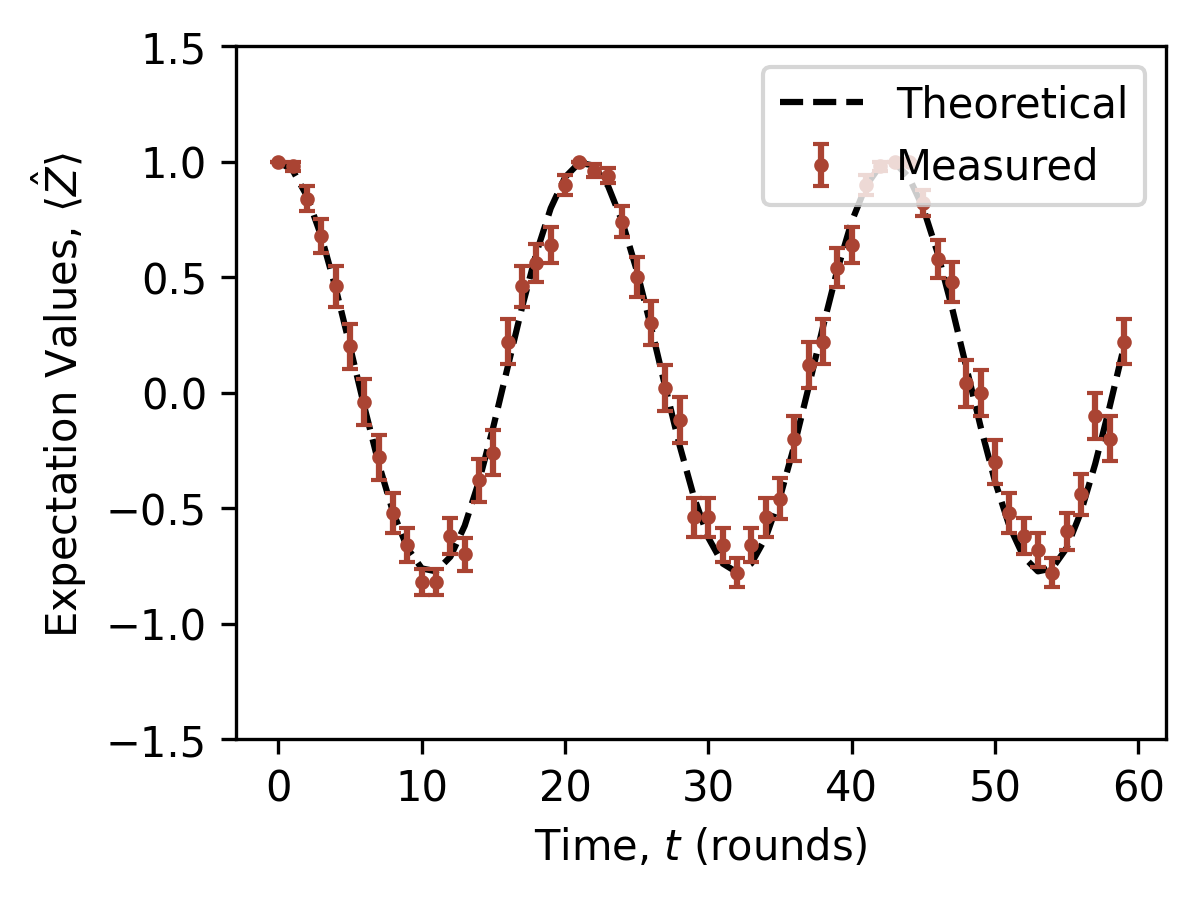

In [192]:
 
def coherent_sim_plot(initial, unitary, t, rep, proj_basis, seed = None):
     
    #mean, theoretical, record = coherent_sim(initial, unitary, t, rep, proj_basis, seed)
    
    fig, ax = plt.subplots(1, 1, figsize=(4, 3), dpi=300)
    ax.set_ylim(-1.5, 1.5) 
    x_axis = np.arange(t)
    theory_y_axis = []
    mean = []
    sample_std_list = []
    for time in x_axis: 
        theoretical = coherent_sim(initial, unitary, time, rep, proj_basis, seed + time)[1]
        theory_y_axis.append(theoretical) 
        
        measured_mean = coherent_sim(initial, unitary, time, rep, proj_basis, seed + time)[0] # mean values of the measurement
        mean.append(measured_mean)

        samples = coherent_sim(initial, unitary, time, rep, proj_basis, seed + time)[2] # mean values of the measurement
        
        sample_std = np.std(samples)
        
        sample_std_list.append(sample_std)


    uncertainty = np.array(sample_std_list)  / np.sqrt(rep)
    print(f"Theoretical Means = {theory_y_axis}")
    #print(f"X AXIS = {x_axis}")
    #print(f"Measured Mean = {measured_mean}")
    print(f"Measured Means = {mean}")
     
    #print(f"Measured Error = {std_error}")
    #print(f"Total Measured Error = {error}")
    ax.plot(x_axis, theory_y_axis, '--k', label='Theoretical')
    
    
    #t_measured = np.linspace(0, t_max, num_measurement) # times at which measurements are performed
    #mean = some_function(t_measured) # mean values of the measurement
    #measured_error = np.std(mean, axis = -1) / np.sqrt(rep)
  
    #print(f"Measured Error = {measured_error}")
    #print(f"Measured Error Array = {error}")
    ax.set_xlabel('Time, $t$ (rounds)') # Description, variable in math form, units
    ax.set_ylabel(f'Expectation Values, $\\langle \hat {{{proj_basis}}}\\rangle$ ') #(mV)

    ax.errorbar(x_axis, mean, # supply the x and y coordinates
                color='#AA4433',
                yerr= uncertainty, # supply the size of the error bars
                fmt='o', # only draw datapoints using circles, don't connect
                markersize=2.5, # size of the circles
                capsize=2, # size of the caps on the error bars
                label='Measured',
                )
    

    ax.legend(loc = "upper right") # create the legend with previously marked information

#coherent_sim_plot(basis(2,0), sigmax(), 10, 8, "z", 58.0)   
#coherent_sim_plot(basis(2,0), (-1j * (np.pi / 16 )/ 2 * sigmax()).expm(), 40, 8, "z", 58.0)  
#coherent_sim_plot(basis(2,0), (-1j * (np.pi / 4 )/ 2 * sigmax()).expm(), 60, 100, "Y", 58.0)  
coherent_sim_plot(basis(2,0), (-1j * (np.pi / 16 )/ 2 * (sigmax() + sigmay() + 0.5 * sigmaz())).expm(), 60, 100, "Z", 58.0) 
#coherent_sim_plot(basis(2,0), (-1j * (np.pi / 2)/ 2 * sigmax()).expm(), 40, 8, "y", 58.0)  

     

This figure is a demonstration on how coherent errors compund over time. This particular example shows how a qubit state moves when applying the same unitary gate to it (coherence error) in every round of measurement. The initial qubit state is $\ket{0}$ $|0\rangle$, the amount of repititions is ${rep}$, and the unitary gate that describes the coherent error per round is $\exp(-i {\frac{\pi}{32}} \hat{x} + \hat{y} + 0.5 \hat{z}$. As initial state evoves by unitary gate, the expectation value can only be between 1 and -1. Irregardles if input, the fucntion will generally be oscillatory. 

As the t grows, the probability of the initial state undergoing a bit flip, is observed to be quadratic in time, for a small enough rounds. 
If the initial state is |0> and you are measuring on the Z basis, then the chance that the qubit state is at |1> when t = 0 is 0%. As t grows, the chances that the qubit state is in the same measured location as the initial state decreases, and the chances that the qubit state is in its bit flip location increases. 

The expectation values of the qubit state is represented by the black dotted lines. 
The averaged  of __ (where blank is the amount of repititions) measurement outcomes of is represented by the red dots 

The statistical uncertainty of the average is represented by the red error bars

In [195]:
#Pauli Error
def pauli_sim(initial, unitary, t, rep, proj_basis, seed = None):
    #observable = x y z 
    match proj_basis:
        case "X": #case x (eigenstates + and -)
            ket  = 1 / np.sqrt(2) * (basis(2,0) - basis(2,1)) 
            proj = ket * (ket).dag() 
            chosen_gate = sigmax()
        case "Y":  #case y (eigenstates +i and -i)
            ket  = 1 / np.sqrt(2) * (basis(2,0) - (1j * basis(2,1))) 
            proj = ket * (ket).dag() 
            chosen_gate = sigmay() 
        case "Z":  #case z (eigenstates 0 and 1 )
            proj = basis(2,1) * basis(2,1).dag()
            chosen_gate = sigmaz()
    
    #perform (t) times:
    errorApply = (unitary**t) * initial 

    UnnormpMS =  proj * errorApply
  
    Prob_minus = np.abs(UnnormpMS.overlap(UnnormpMS)) 
    Prob_plus = 1 - Prob_minus  
    #print(f"Minus Prob: {Prob_minus}")  
    #print(f"Plus Prob: {Prob_plus}") 
    #r = np.random.uniform(Prob_plus,Prob_minus) 
    rand.seed(seed)
    r = rand.choices(population=[-1, 1], weights=[Prob_minus, Prob_plus], k=rep)
    #print(np.mean(r) , expect(chosen_gate, errorApply), r)
    #return np.mean(r) , np.real(errorApply.dag() * chosen_gate * errorApply), r
    return np.mean(r), expect(chosen_gate, errorApply), r 

pauli_sim(basis(2,0), sigmax(), 10, 8, "Z", 58.0)  

def realpauil(before, pi, px, py, pz): 
    
    return "after" 

Mean = [ 0.00000000e+00  2.58819045e-01  5.00000000e-01  7.07106781e-01
  8.66025404e-01  9.65925826e-01  1.00000000e+00  9.65925826e-01
  8.66025404e-01  7.07106781e-01  5.00000000e-01  2.58819045e-01
  1.22464680e-16 -2.58819045e-01 -5.00000000e-01 -7.07106781e-01
 -8.66025404e-01 -9.65925826e-01 -1.00000000e+00 -9.65925826e-01
 -8.66025404e-01 -7.07106781e-01 -5.00000000e-01 -2.58819045e-01
 -2.44929360e-16]
T measured = [ 0.          0.41666667  0.83333333  1.25        1.66666667  2.08333333
  2.5         2.91666667  3.33333333  3.75        4.16666667  4.58333333
  5.          5.41666667  5.83333333  6.25        6.66666667  7.08333333
  7.5         7.91666667  8.33333333  8.75        9.16666667  9.58333333
 10.        ]
Measured Mean = [ 0.10693004  0.30317491  0.54170164  0.73234685  1.09603069  1.15304088
  1.01461912  0.99165781  0.68662928  0.81279085  0.53549502  0.26420895
 -0.00685373 -0.36161895 -0.4183151  -0.56779244 -0.86896423 -1.03106098
 -0.96077658 -0.98091874 -0.895

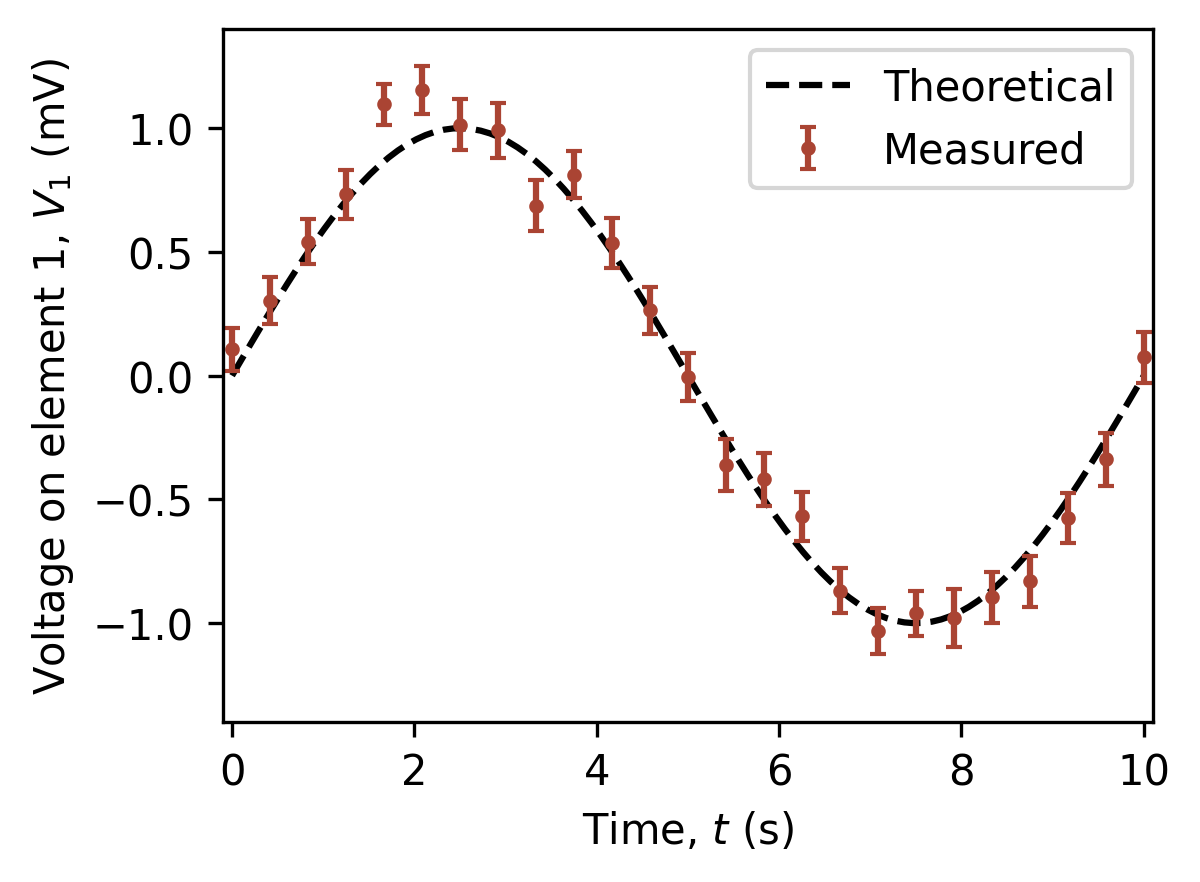

In [158]:
def example_plot(period=10, stderr=1, t_max=10):
    '''The is an example plotting function

    Parameters
    ----------
    period : float, default=1
        period of the sinusoid
    stderr : float, default=1
        The size of the error bar
    t_max : float, default=10
        The maximum time, plotted on the x-axis
    '''
    # first generate some fake data to plot
    def some_function(t):
        # this function generates theoretical values
        return np.sin(2 * np.pi * t / period)
    
    # compute theoretical values
    t_list = np.linspace(0, t_max, 100)
    theoretical = some_function(t_list)

    # make up some measured values
    num_measurement = 25 # measure at 8 different time values
    t_measured = np.linspace(0, t_max, num_measurement) # times at which measurements are performed
    mean = some_function(t_measured) # mean values of the measurement
    
    # generate some measurement error for each measurement performed
    repetitions = 100 # each value is measured repeatedly
    measurement_error = stderr * np.random.normal(size=(num_measurement, repetitions))
    measured = mean[:, None] + measurement_error
    # take the average of the data with errors at each time value
    # also compute the standard error on the average
    measured_mean = np.mean(measured, axis=-1)
    measured_error = np.std(measured, axis=-1) / np.sqrt(repetitions)
    
    print(f"Mean = {mean}")
    print(f"T measured = {t_measured}")
    print(f"Measured Mean = {measured_mean}")
    print(f"Measured Error = {measured_error}")

    
    ########################
    # Plotting starts here #
    ########################

    # make a figure that has one row and one column
    # The total size of the figure is 6 inch wide by 4 inch tall
    # the resolution of the figure is 300 pixels per inch
    # we will mostly operate on the ax object, which refers to the
    # axes on which we will plot
    fig, ax = plt.subplots(1, 1, figsize=(4, 3), dpi=300)

    # draw the theoretical line using the list of x and y coordinates
    # the line should be black and dashed
    # mark the line to be labeled as Theoretical later
    ax.plot(t_list, theoretical, '--k', label='Theoretical')

    # draw the fake measured data with errorbars
    ax.errorbar(t_measured, measured_mean, # supply the x and y coordinates
                color='#AA4433',
                yerr=measured_error, # supply the size of the error bars
                fmt='o', # only draw datapoints using circles, don't connect
                markersize=2.5, # size of the circles
                capsize=2, # size of the caps on the error bars
                label='Measured',
                )

    # adjust x, y axis limits
    ax.set_xlim(-0.1, t_max+0.1) # restrict the x axis limits
    ax.set_ylim(-1.4, 1.4) # restrict the y axis limits

    # put axis labels
    ax.set_xlabel('Time, $t$ (s)') # Description, variable in math form, units
    ax.set_ylabel('Voltage on element 1, $V_1$ (mV)')

    ax.legend() # create the legend with previously marked information

    # optionally adjust the distance of the bounding box to the edge of
    # the figure
    # fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

    # optionally save to file
    #fig.savefig('test_filename.png')
    #fig.savefig('test_filename.pdf')
    return

# test the function
example_plot(period=10, stderr=1, t_max=10)